# Módulo 5 - Técnicas de Programação II

## Introdução

Gráficos são representações visuais dos dados, que buscam facilitar o entendimento dos mesmos. Podem ser muito úteis na identificação de variáveis importantes para uma modelagem ou tomada de decisão.


**Tipos de gráficos mais usuais:**
- **Scatter plot (ou gráfico de dispersão):**
Dadas duas variáveis X e Y, cada observação (par de valores (x,y)) é representado por um ponto no gráfico. Na imagem abaixo, uma observação (x,y) = (4,5) é representada pelo X vermelho.
<img src="./images/img_scatterplot_editada.png" alt="Drawing" style="width: 500px;"/>

- **Gráfico de linhas:**
O gráfico de linhas é muito utilizado quando estamos querendo encontrar tendências de um conjunto de variáveis. No geral, a variável alocada no eixo horizontal representa categorias ordinais, geralmente temporais (como por exemplo: meses, anos, dias, semanas, lotes em ordem de fabricação etc). Para construí-lo, primeiro aplica-se um gráfico de dispersão dessas variáveis, e depois unem-se os pontos por linhas, como mostra a imagem abaixo. Podemos imaginar que cada categoria é um lote de produção de uma mercadoria (em que o lote 1 foi produzido antes do lote 2, e assim por diante), e no eixo vertical, têm se a quantidade vendida de cada lote. Ainda, há 3 séries representadas por cores, que podem representar, por exemplo, três clientes diferentes que adquiriram as mercadorias.
<img src="./images/grafico_linhas.jpg" alt="Drawing" style="width: 500px;"/>

- **Gráfico de pizza/Pie plot (ou gráfico de setores):**
Este gráfico tem como objetivo representar um valor relativo de cada categoria em relação a um todo. Exemplo: de todo o lucro de uma empresa revendedora de aparelhos celular, quantos porcento são relativos a cada marca de produto comercializado.
<img src="./images/grafico_pizza.png" alt="Drawing" style="width: 400px;"/>

- **Gráfico de barras (horizontal e vertical):**
Um gráfico de barras é uma forma de visualização de dados categóricos, em que cada categoria é representada por uma barra, cujo tamanho representa sua frequência/quantidade de observações. Pode ser representado de forma vertical (conhecido também como gráfico de colunas) ou de forma horizontal (em que o gráfico parece "deitado". No exemplo abaixo, o mesmo conjunto de dados é representado das duas formas. 

Observação: Aqui, os valores "1", "2" e "3" das barras representam categorias, e não uma variável contínua.
<img src="./images/grafico_barras.png" alt="Drawing" style="width: 500px;"/>

- **Histograma:** 
Um histograma é muito parecido com um gráfico de barras, e possui a mesma ideia: cada coluna representa uma frequência/quantidade. Entretanto, o eixo horizontal deste tipo de gráfico é uma variável contínua, e a ideia é observar a distribuição das observações desta variável. Exemplos de perguntas que podemos estar tentando responder ao analisar esse tipo de gráfico, são: "quais são os valores mais frequentes nessa variável contínua?" e "Qual a probabilidade de uma nova observação ter determinado valor?"

Para se construir as barras deste gráfico, a variável contínua é agrupada em intervalos, e o tamanho da barra representa o número de observações que possuem valores dentro deste intervalo. É comum encontrar histogramas com um traço linear ligando o topo dessas barras pelo meio, de forma a facilitar a identificação de uma distribuição estatística.
<img src="./images/histograma.png" alt="Drawing" style="width: 500px;"/>

- **Box-Plot:**
Os box-plot, assim como os histogramas, são gráficos estatísticos que permitem analisar uma distribuição dos dados, mas com uma representação diferente. Apesar de muito utilizados por estatísticos e cientistas de dados, a maioria das pessoas que não estão acostumadas a eles, têm dificuldade em interpretá-los. 

A representação do box-plot se baseia em medidas de quartis: uma caixinha central é desenhada ligando o primeiro (Q1) e terceiro (Q3) quartis (25% e 75%, respectivamente), e uma reta corta essa 'caixa' no quartil central (Q2 = 50%). Na parte inferior e superior do gráfico, é traçada uma reta de tamanho máximo 1.5xIQ, em que IQ = Q3-Q1. Essa reta é traçada até o último valor da variável que ainda esteja dentro desse limite. Observações acima ou abaixo dele, são representadas por bolinhas, e muito chamadas de 'outliers' (valor atípico). Abaixo, uma representação dos componentes de um box-plot, e um gráfico exibindo box-plots das distribuições de temperaturas de diferentes cidades.
<img src="./images/boxplot2.png" alt="Drawing" style="width: 500px;"/>
<img src="./images/boxplot.png" alt="Drawing" style="width: 500px;"/>

## Gráficos com pandas

A biblioteca pandas, que estudamos no módulo 4, permite realizar alguns gráficos simples, baseados na biblioteca matplotlib. Vamos aprender a aplicá-los utilizando a base de dados do titanic como exemplo.  

**Documentação:** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/titanic.csv')

## Gráfico de barras

In [2]:
df_vendas = pd.DataFrame({'Mês' : ['Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr'],
                         'Vendas' : np.random.randint(low=100, size=12),
                          'Produto' : np.repeat(['Samsung', 'Apple', 'Motorola'],4)})

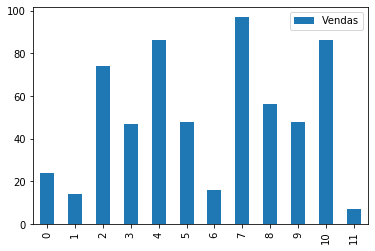

In [4]:
df_vendas.plot(kind='bar')

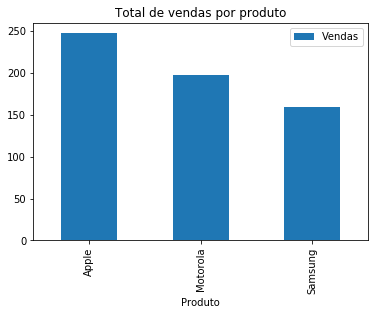

In [8]:
df_vendas.groupby(['Produto']).sum().plot(kind='bar', title='Total de vendas por produto')

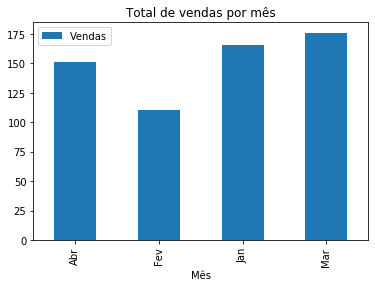

In [9]:
df_vendas.groupby(['Mês']).sum().plot(kind='bar', title='Total de vendas por mês')

In [11]:
df_vendas['Mês'] = pd.Categorical(df_vendas['Mês'], categories=['Jan', 'Fev', 'Mar', 'Abr'], ordered=True)

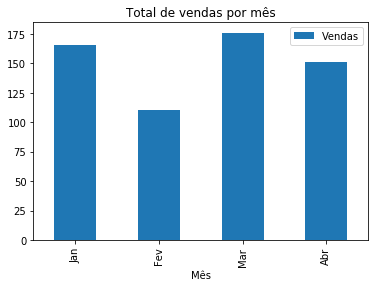

In [12]:
df_vendas.groupby(['Mês']).sum().plot(kind='bar', title='Total de vendas por mês')

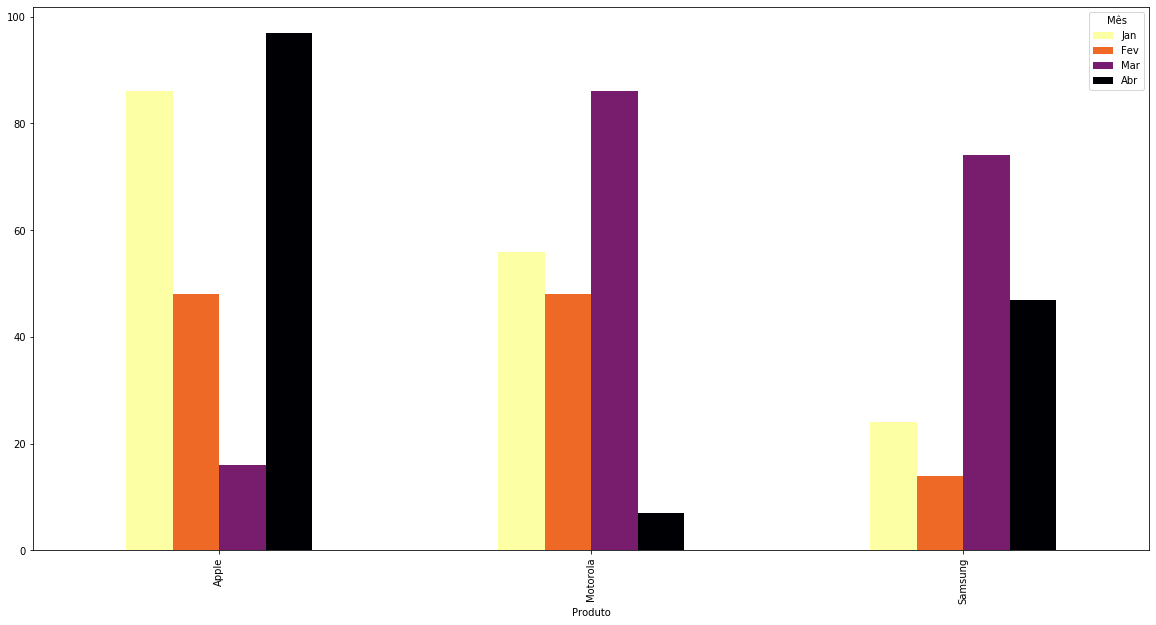

In [25]:
df_vendas.pivot(index='Produto', columns='Mês', values='Vendas').plot(kind='bar', figsize=(20,10), colormap='inferno_r')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001977D64D408>,
      dtype=object)

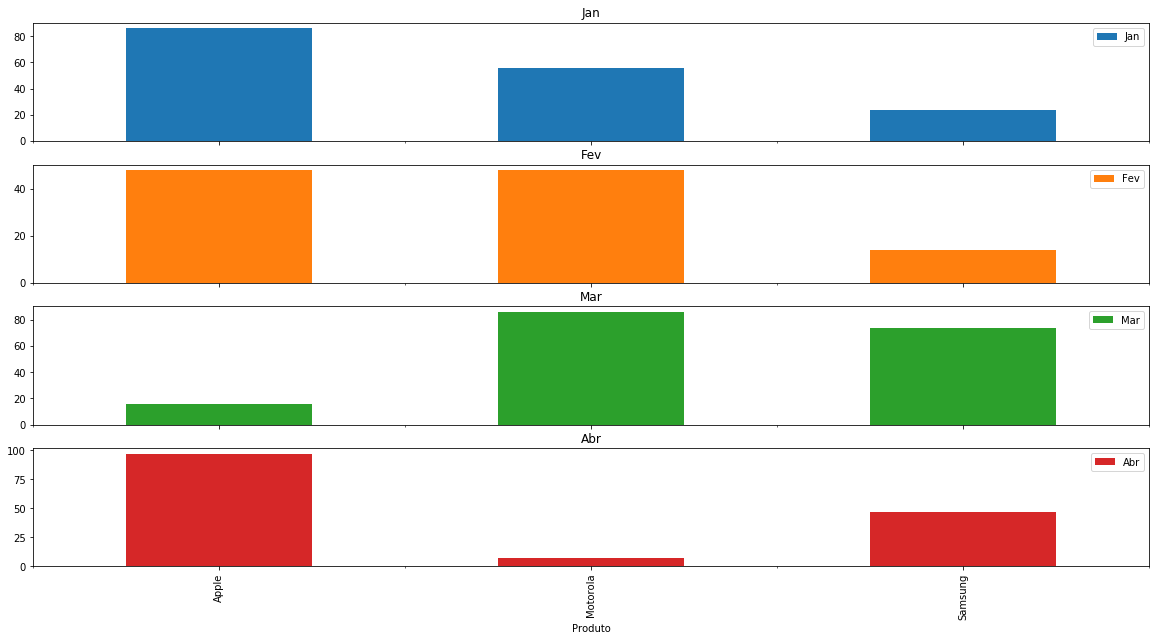

In [16]:
df_vendas.pivot(index='Produto', columns='Mês', values='Vendas').plot(kind='bar', figsize=(20,10), subplots=True)

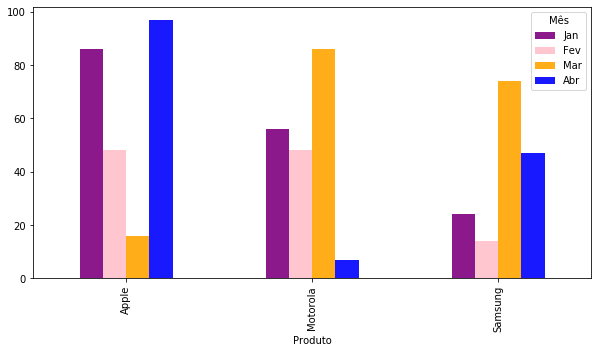

In [29]:
df_vendas.pivot(index='Produto', columns='Mês', values='Vendas').plot(kind='bar', figsize=(10,5), color={'Abr' : 'blue',
                                                                                                        'Fev' : 'pink',
                                                                                                        'Mar' : 'orange',
                                                                                                        'Jan' : 'purple'},
                                                                     alpha=.9)

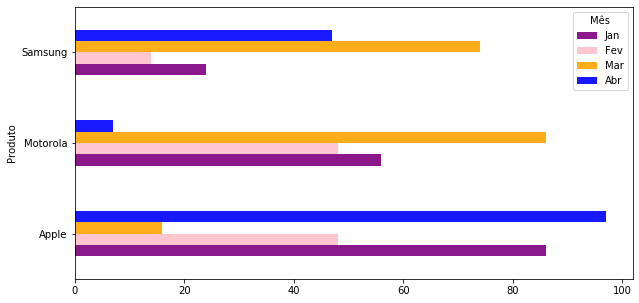

In [30]:
df_vendas.pivot(index='Produto', columns='Mês', values='Vendas').plot(kind='barh', figsize=(10,5), color={'Abr' : 'blue',
                                                                                                        'Fev' : 'pink',
                                                                                                        'Mar' : 'orange',
                                                                                                        'Jan' : 'purple'},
                                                                     alpha=.9)

## Histograma

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


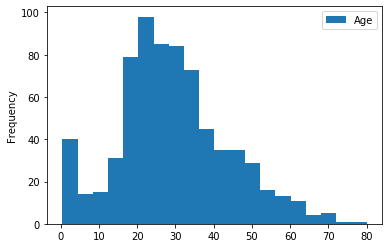

In [42]:
df.plot(y='Age', kind='hist',bins=20)

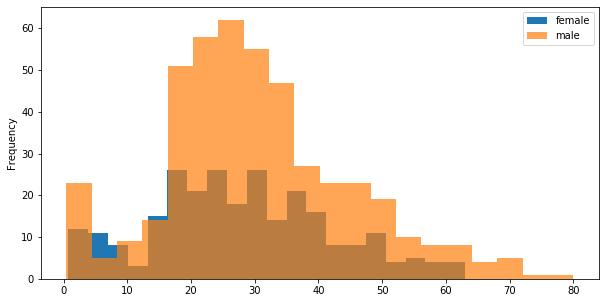

In [51]:
ax1 = df[df['Sex']=='female'].plot(y='Age', kind='hist', bins=20, figsize=(10,5), label='female')
ax2 = df[df['Sex']=='male'].plot(y='Age', kind='hist', bins=20, figsize=(10,5), alpha=0.7, label='male', ax=ax1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000197008B2988>,
      dtype=object)

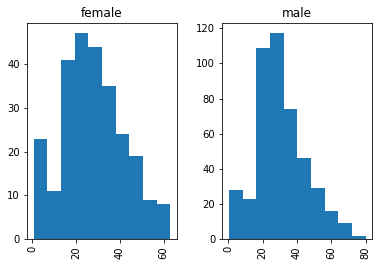

In [54]:
df.hist(column='Age', by='Sex')

## Box-plot

C:\Users\gabi_\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


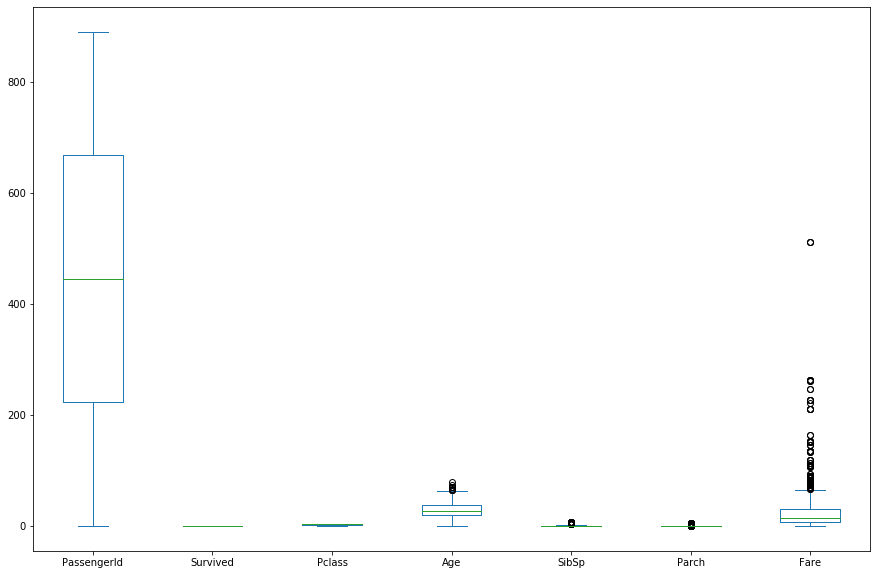

In [56]:
df.plot(kind='box', figsize=(15,10))

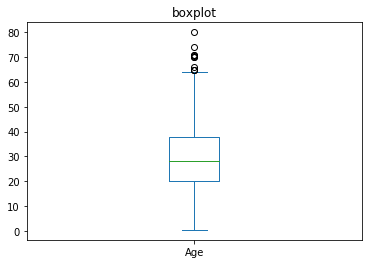

In [73]:
df.plot(y='Age', kind='box', title='boxplot')

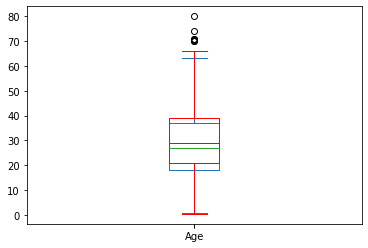

In [78]:
ax1 = df[df['Sex']=='female'].plot(y='Age', kind='box')
ax2 = df[df['Sex']=='male'].plot(y='Age', kind='box', ax=ax1, color='red')

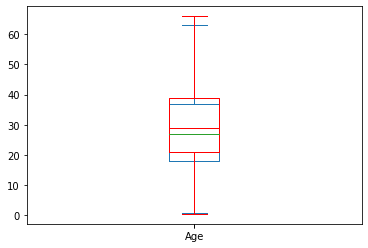

In [77]:
ax1 = df[df['Sex']=='female'].plot(y='Age', kind='box')
ax2 = df[df['Sex']=='male'].plot(y='Age', kind='box', ax=ax1, color='red', showfliers=False)

C:\Users\gabi_\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\Users\gabi_\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019702721B08>,
      dtype=object)

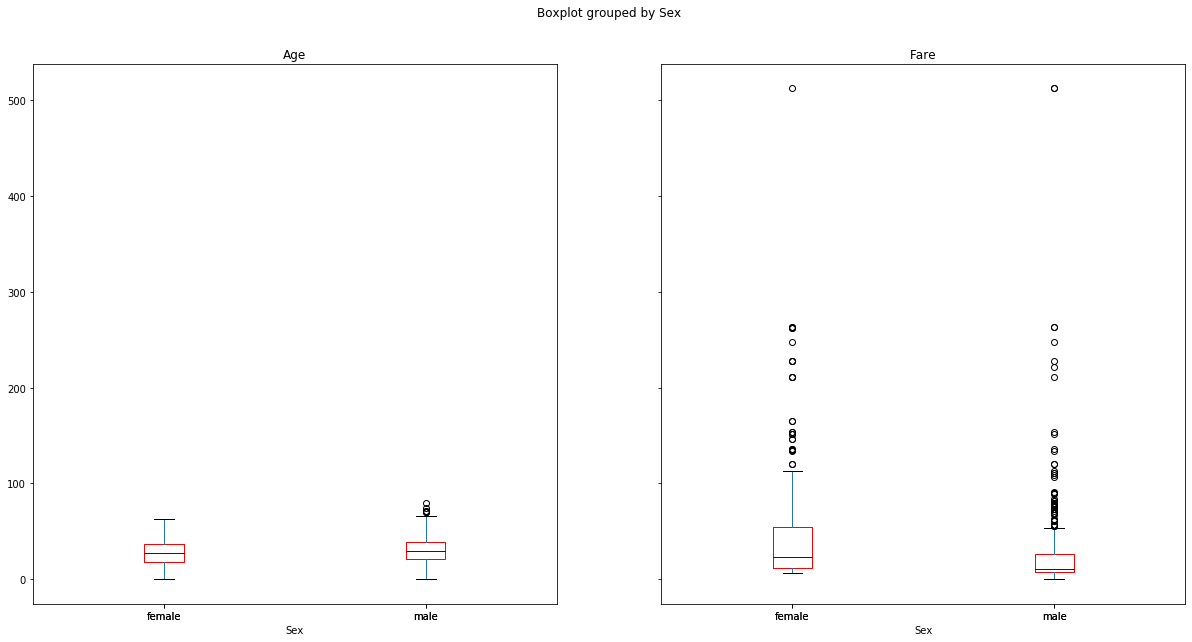

In [80]:
df.boxplot(column=['Age', 'Fare'], by='Sex', grid=False, color={'boxes':'red',
                                                               'medians' : 'blue'}, figsize=(20,10))

C:\Users\gabi_\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\Users\gabi_\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019702459688>,
      dtype=object)

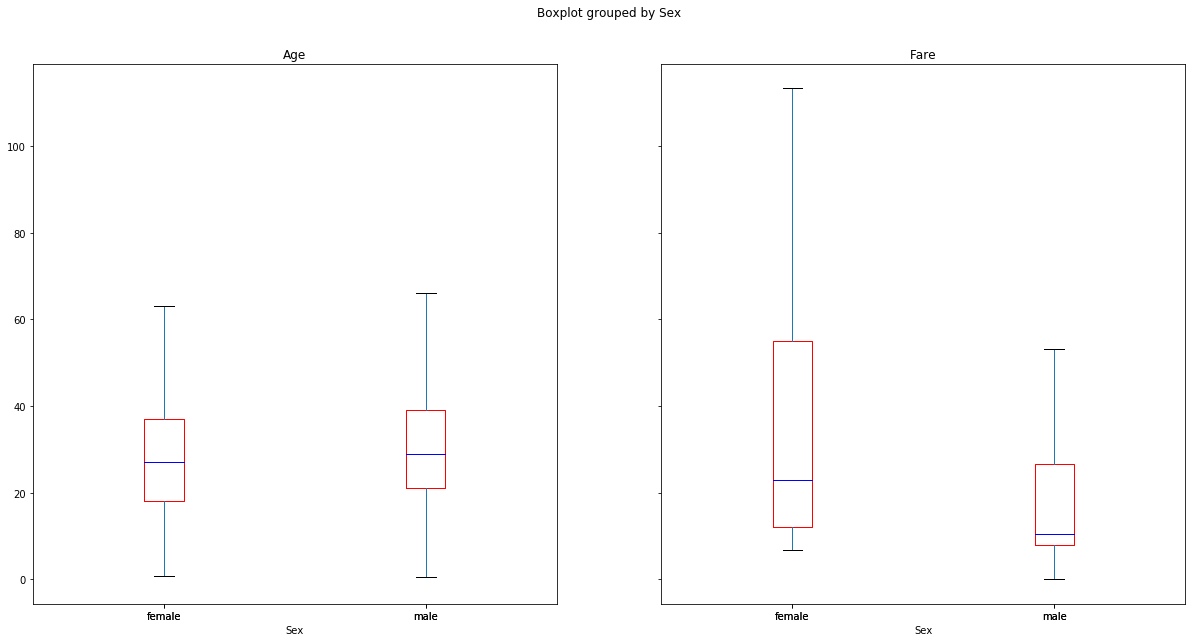

In [79]:
df.boxplot(column=['Age', 'Fare'], by='Sex', grid=False, color={'boxes':'red',
                                                               'medians' : 'blue'}, figsize=(20,10), showfliers=False)